<a href="https://colab.research.google.com/github/jahaannadkarni1/Stock_Prices_WebScraping/blob/main/Stock_Prices_FB_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pystan fbprophet

In [2]:
from fbprophet import Prophet

In [3]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def get_url(url):
    r = requests.get(url)
    soup = bs(r.content,'html.parser')
    return soup

In [5]:
url = "https://www.dogsofthedow.com/largest-companies-by-market-cap.htm"

soup = get_url(url)

In [6]:
def get_quote():
    stock_quotes = []
    for i in soup.select('tbody a')[:-1]:
        stock_quotes.append(i.get_text().strip().replace('.','-'))
    return stock_quotes

In [7]:
get_quote()

['AAPL',
 'MSFT',
 'AMZN',
 'GOOGL',
 'FB',
 'BABA',
 'BRK-A',
 'TSM',
 'TSLA',
 'V',
 'JPM',
 'JNJ',
 'MA',
 'DIS',
 'WMT',
 'UNH',
 'BAC',
 'PG',
 'NVDA',
 'HD',
 'PYPL',
 'XOM',
 'CMCSA',
 'INTC',
 'VZ',
 'KO',
 'NFLX',
 'T',
 'ORCL',
 'NKE',
 'CVX',
 'ASML',
 'TM',
 'ABT',
 'ADBE',
 'CSCO',
 'LLY',
 'PFE',
 'CRM',
 'NVS',
 'MRK',
 'ABBV',
 'PEP',
 'TMO',
 'AVGO',
 'PDD',
 'RDS-A',
 'ACN',
 'WFC',
 'TMUS']

In [8]:
def get_companyname():
    company_name = []
    for i in soup.select('tbody .column-2')[:-2]:
        company_name.append(i.get_text().strip())
    return company_name

In [9]:
get_companyname()

['Apple',
 'Microsoft',
 'Amazon',
 'Alphabet',
 'Facebook',
 'Alibaba',
 'Berkshire Hathaway',
 'Taiwan Semiconductor',
 'Tesla',
 'Visa',
 'JPMorgan Chase',
 'Johnson & Johnson',
 'Mastercard',
 'Disney',
 'Walmart',
 'UnitedHealth',
 'Bank of America',
 'Procter & Gamble',
 'NVIDIA',
 'Home Depot',
 'PayPal',
 'ExxonMobil',
 'Comcast',
 'Intel',
 'Verizon',
 'Coca-Cola',
 'Netflix',
 'AT&T',
 'Oracle',
 'Nike',
 'Chevron',
 'ASML',
 'Toyota',
 'Abbott Laboratories',
 'Adobe',
 'Cisco Systems',
 'Eli Lilly',
 'Pfizer',
 'Salesforce',
 'Novartis AG',
 'Merck',
 'AbbVie',
 'Pepsi',
 'Thermo Fisher Scientific',
 'Broadcom',
 'Pinduoduo',
 'Royal Dutch Shell',
 'Accenture',
 'Wells Fargo',
 'T-Mobile US']

In [10]:
ticker_company = {get_quote()[i]:get_companyname()[i] for i in range(len(get_quote()))}

In [11]:
ticker_company

{'AAPL': 'Apple',
 'ABBV': 'AbbVie',
 'ABT': 'Abbott Laboratories',
 'ACN': 'Accenture',
 'ADBE': 'Adobe',
 'AMZN': 'Amazon',
 'ASML': 'ASML',
 'AVGO': 'Broadcom',
 'BABA': 'Alibaba',
 'BAC': 'Bank of America',
 'BRK-A': 'Berkshire Hathaway',
 'CMCSA': 'Comcast',
 'CRM': 'Salesforce',
 'CSCO': 'Cisco Systems',
 'CVX': 'Chevron',
 'DIS': 'Disney',
 'FB': 'Facebook',
 'GOOGL': 'Alphabet',
 'HD': 'Home Depot',
 'INTC': 'Intel',
 'JNJ': 'Johnson & Johnson',
 'JPM': 'JPMorgan Chase',
 'KO': 'Coca-Cola',
 'LLY': 'Eli Lilly',
 'MA': 'Mastercard',
 'MRK': 'Merck',
 'MSFT': 'Microsoft',
 'NFLX': 'Netflix',
 'NKE': 'Nike',
 'NVDA': 'NVIDIA',
 'NVS': 'Novartis AG',
 'ORCL': 'Oracle',
 'PDD': 'Pinduoduo',
 'PEP': 'Pepsi',
 'PFE': 'Pfizer',
 'PG': 'Procter & Gamble',
 'PYPL': 'PayPal',
 'RDS-A': 'Royal Dutch Shell',
 'T': 'AT&T',
 'TM': 'Toyota',
 'TMO': 'Thermo Fisher Scientific',
 'TMUS': 'T-Mobile US',
 'TSLA': 'Tesla',
 'TSM': 'Taiwan Semiconductor',
 'UNH': 'UnitedHealth',
 'V': 'Visa',
 'VZ':

In [12]:
stock_dict = {}
def get_stocks(): 
              
    for i in get_quote():
        stock_url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?'

        params = { 'range' : '5y',
               'interval' : '1d',
              'events' : 'history',
                'includeAdjustedClose' : 'true'}
        stock_dict[i] = requests.get(stock_url.format(i),params=params).text.split('\n')
    return stock_dict

In [13]:
get_stocks()['AAPL'][:5]

['Date,Open,High,Low,Close,Adj Close,Volume',
 '2016-03-09,25.327499,25.395000,25.067499,25.280001,23.513155,108806800',
 '2016-03-10,25.352501,25.559999,25.037500,25.292500,23.524775,134054400',
 '2016-03-11,25.559999,25.570000,25.375000,25.565001,23.778234,109632800',
 '2016-03-14,25.477501,25.727501,25.445000,25.629999,23.838688,100304400']

In [14]:
for i in stock_dict.keys():
    stock_dict[i].pop(0)

In [15]:
first_clean = [[[i+','+j] for i in stock_dict[j]] for j in stock_dict.keys()]

In [16]:
data_flatten = [k.split(',') for i in first_clean for j in i for k in j]

In [17]:
data_flatten[:5]

[['2016-03-09',
  '25.327499',
  '25.395000',
  '25.067499',
  '25.280001',
  '23.513155',
  '108806800',
  'AAPL'],
 ['2016-03-10',
  '25.352501',
  '25.559999',
  '25.037500',
  '25.292500',
  '23.524775',
  '134054400',
  'AAPL'],
 ['2016-03-11',
  '25.559999',
  '25.570000',
  '25.375000',
  '25.565001',
  '23.778234',
  '109632800',
  'AAPL'],
 ['2016-03-14',
  '25.477501',
  '25.727501',
  '25.445000',
  '25.629999',
  '23.838688',
  '100304400',
  'AAPL'],
 ['2016-03-15',
  '25.990000',
  '26.295000',
  '25.962500',
  '26.145000',
  '24.317701',
  '160270800',
  'AAPL']]

In [18]:
data_flatten[:5]

[['2016-03-09',
  '25.327499',
  '25.395000',
  '25.067499',
  '25.280001',
  '23.513155',
  '108806800',
  'AAPL'],
 ['2016-03-10',
  '25.352501',
  '25.559999',
  '25.037500',
  '25.292500',
  '23.524775',
  '134054400',
  'AAPL'],
 ['2016-03-11',
  '25.559999',
  '25.570000',
  '25.375000',
  '25.565001',
  '23.778234',
  '109632800',
  'AAPL'],
 ['2016-03-14',
  '25.477501',
  '25.727501',
  '25.445000',
  '25.629999',
  '23.838688',
  '100304400',
  'AAPL'],
 ['2016-03-15',
  '25.990000',
  '26.295000',
  '25.962500',
  '26.145000',
  '24.317701',
  '160270800',
  'AAPL']]

In [19]:
colum = ['Date,Open,High,Low,Close,Adj Close,Volume'][0].split(',') + ['Company']

In [20]:
df = pd.DataFrame(data=data_flatten,columns=colum)

In [21]:
df.Date[0]

'2016-03-09'

In [24]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2016-03-09,25.327499,25.395000,25.067499,25.280001,23.513155,108806800,AAPL
1,2016-03-10,25.352501,25.559999,25.037500,25.292500,23.524775,134054400,AAPL
2,2016-03-11,25.559999,25.570000,25.375000,25.565001,23.778234,109632800,AAPL
3,2016-03-14,25.477501,25.727501,25.445000,25.629999,23.838688,100304400,AAPL
4,2016-03-15,25.990000,26.295000,25.962500,26.145000,24.317701,160270800,AAPL


In [25]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')

In [26]:
df.Date[0]

'2016-03-09'

In [27]:
#df.to_csv('stockPriceXL-NEW.csv')

In [28]:
data = [[df.loc[df['Company']=='AAPL']['Date']],[df.loc[df['Company']=='AAPL']['Close']]]

In [29]:
data

[[0       2016-03-09
  1       2016-03-10
  2       2016-03-11
  3       2016-03-14
  4       2016-03-15
             ...    
  1253    2021-03-02
  1254    2021-03-03
  1255    2021-03-04
  1256    2021-03-05
  1257    2021-03-08
  Name: Date, Length: 1258, dtype: object], [0        25.280001
  1        25.292500
  2        25.565001
  3        25.629999
  4        26.145000
             ...    
  1253    125.120003
  1254    122.059998
  1255    120.129997
  1256    121.419998
  1257    116.360001
  Name: Close, Length: 1258, dtype: object]]

In [38]:
df_aapl = df.loc[df['Company']=='AAPL'][['Date','Close']]

In [39]:
df_aapl

,Date,Close
0,2016-03-09,25.280001
1,2016-03-10,25.292500
2,2016-03-11,25.565001
3,2016-03-14,25.629999
4,2016-03-15,26.145000
...,...,...
1253,2021-03-02,125.120003
1254,2021-03-03,122.059998
1255,2021-03-04,120.129997
1256,2021-03-05,121.419998


In [40]:
df_aapl

,Date,Close
0,2016-03-09,25.280001
1,2016-03-10,25.292500
2,2016-03-11,25.565001
3,2016-03-14,25.629999
4,2016-03-15,26.145000
...,...,...
1253,2021-03-02,125.120003
1254,2021-03-03,122.059998
1255,2021-03-04,120.129997
1256,2021-03-05,121.419998


In [41]:
df_aapl.columns = ['ds','y']

In [42]:
df_aapl

,ds,y
0,2016-03-09,25.280001
1,2016-03-10,25.292500
2,2016-03-11,25.565001
3,2016-03-14,25.629999
4,2016-03-15,26.145000
...,...,...
1253,2021-03-02,125.120003
1254,2021-03-03,122.059998
1255,2021-03-04,120.129997
1256,2021-03-05,121.419998


In [43]:
m = Prophet()

In [44]:
m.fit(df_aapl)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [46]:
future = m.make_future_dataframe(periods=15)
future.tail(20)

,ds
1253,2021-03-02
1254,2021-03-03
1255,2021-03-04
1256,2021-03-05
1257,2021-03-08
1258,2021-03-09
1259,2021-03-10
1260,2021-03-11
1261,2021-03-12
1262,2021-03-13


In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
1253,2021-03-02,134.225448,128.722613,139.981304
1254,2021-03-03,134.271483,128.842775,139.399559
1255,2021-03-04,134.258075,128.997060,139.391203
1256,2021-03-05,134.173722,128.507165,139.538080
1257,2021-03-08,134.489282,128.729105,140.161869
1258,2021-03-09,134.795605,128.855122,140.031614
1259,2021-03-10,134.887205,129.189943,140.059635
1260,2021-03-11,134.917302,129.319415,140.288451
1261,2021-03-12,134.874745,129.797801,139.954243
1262,2021-03-13,132.486219,127.073930,137.749579


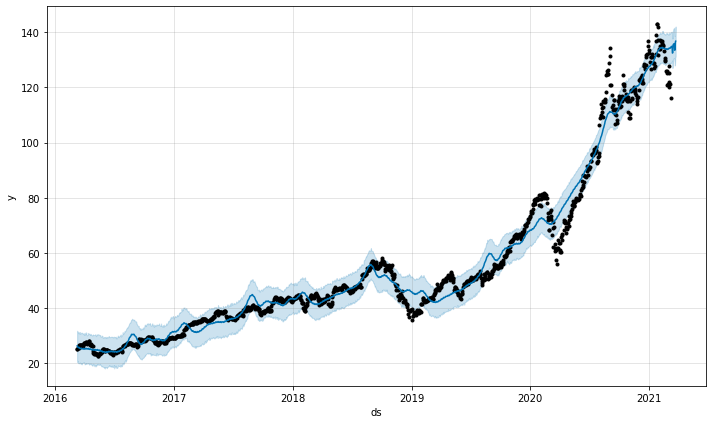

In [48]:
fig1 = m.plot(forecast)